In [16]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Problem 1

In [2]:
housedata = pd.read_csv("train.csv")
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
numeric_data = pd.DataFrame(housedata[["LotArea", "GrLivArea", "TotalBsmtSF", "GarageArea", "SalePrice"]])

<AxesSubplot:>

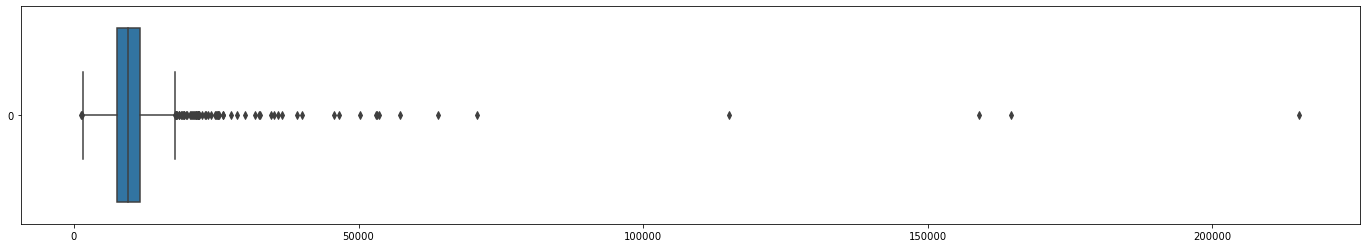

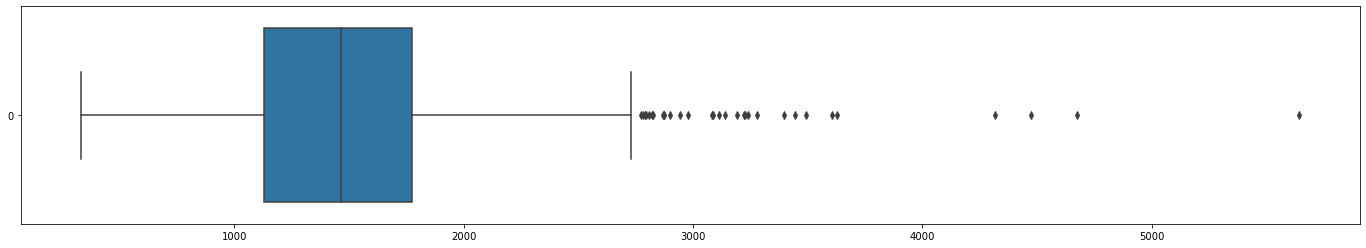

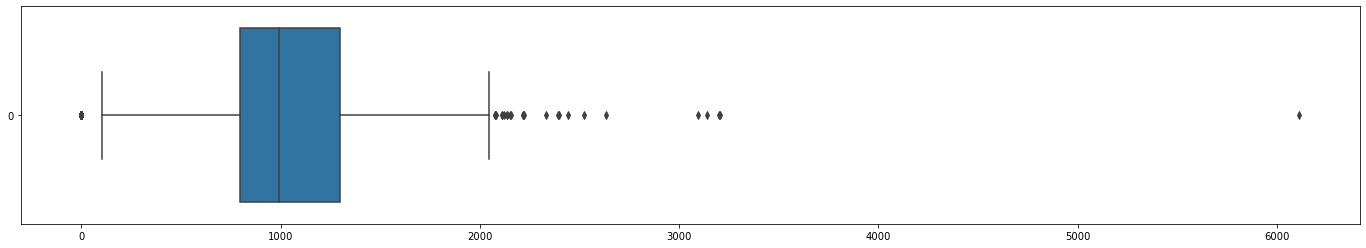

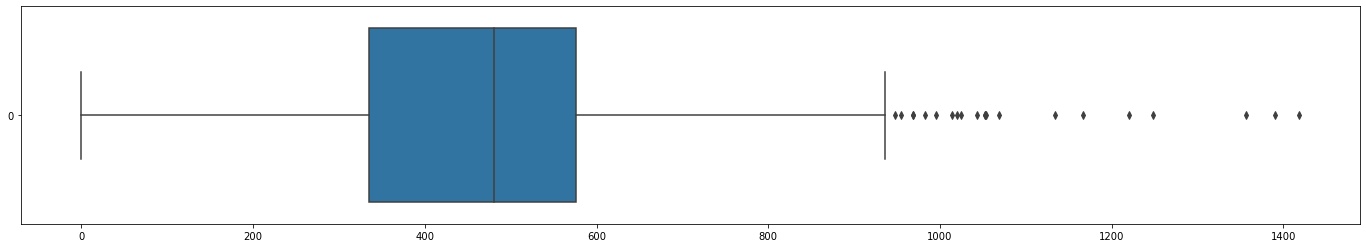

In [4]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = housedata['LotArea'], orient = 'h')
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = housedata['GrLivArea'], orient = 'h')
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = housedata['TotalBsmtSF'], orient = 'h')
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = housedata['GarageArea'], orient = 'h')

### 1a) LotArea has the most number of outliers as per box-plot.

In [5]:
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Identify outliers
outliers = ((numeric_data < (Q1 - 1.5 * (Q3 - Q1))) | (numeric_data > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
outliers.sum()

LotArea        69
GrLivArea      31
TotalBsmtSF    61
GarageArea     21
SalePrice      61
dtype: int64

### 1a) 69 outliers at LotArea

<AxesSubplot:xlabel='GarageArea', ylabel='Density'>

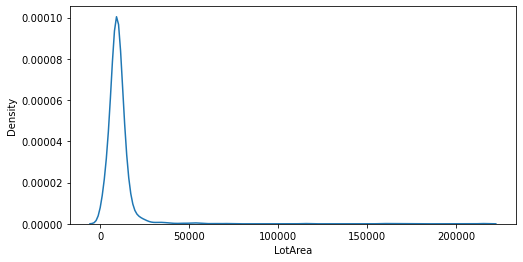

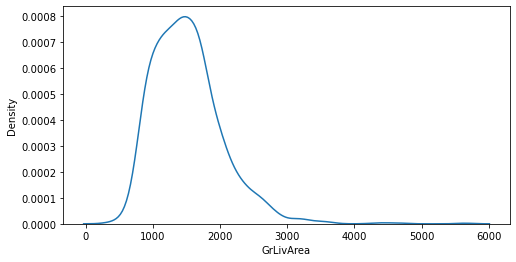

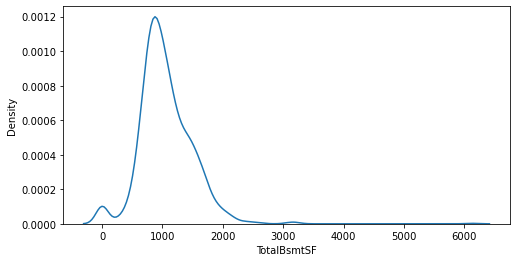

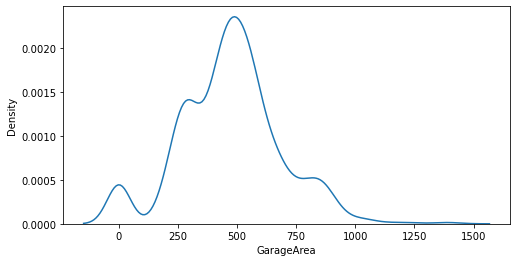

In [6]:
f = plt.figure(figsize=(8, 4))
sb.kdeplot(data = housedata['LotArea'])
f = plt.figure(figsize=(8, 4))
sb.kdeplot(data = housedata['GrLivArea'])
f = plt.figure(figsize=(8, 4))
sb.kdeplot(data = housedata['TotalBsmtSF'])
f = plt.figure(figsize=(8, 4))
sb.kdeplot(data = housedata['GarageArea'])

### 1b) LotArea is most skewed, positive skew.

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


<AxesSubplot:>

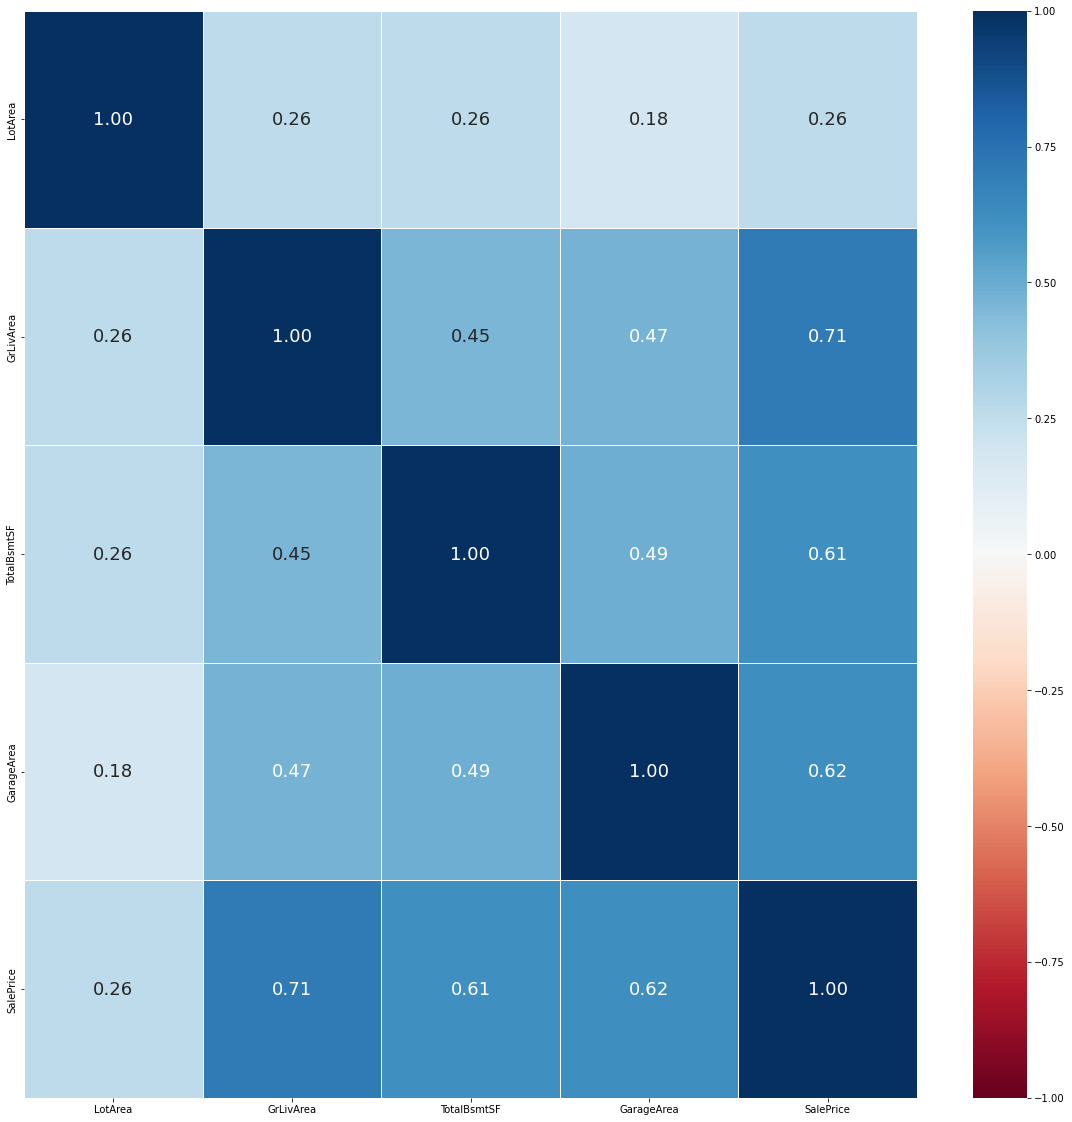

In [7]:
# Correlation Matrix
print(numeric_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

### 1c) Top two variables(w highest correlation values): GrLivArea, GarageArea

# Problem 2

In [8]:
print("Number of levels in MSSubClass:", len(housedata["MSSubClass"].unique()))
print("Number of levels in Neighborhood:", len(housedata["Neighborhood"].unique()))
print("Number of levels in BldgType:", len(housedata["BldgType"].unique()))
print("Number of levels in OverallQual:", len(housedata["OverallQual"].unique()))

Number of levels in MSSubClass: 15
Number of levels in Neighborhood: 25
Number of levels in BldgType: 5
Number of levels in OverallQual: 10


In [9]:
print(housedata["Neighborhood"].value_counts())

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


### 2a) Neighborhood has highest number of levels at 25. "CollgCr" has the highest number of houses at 150.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

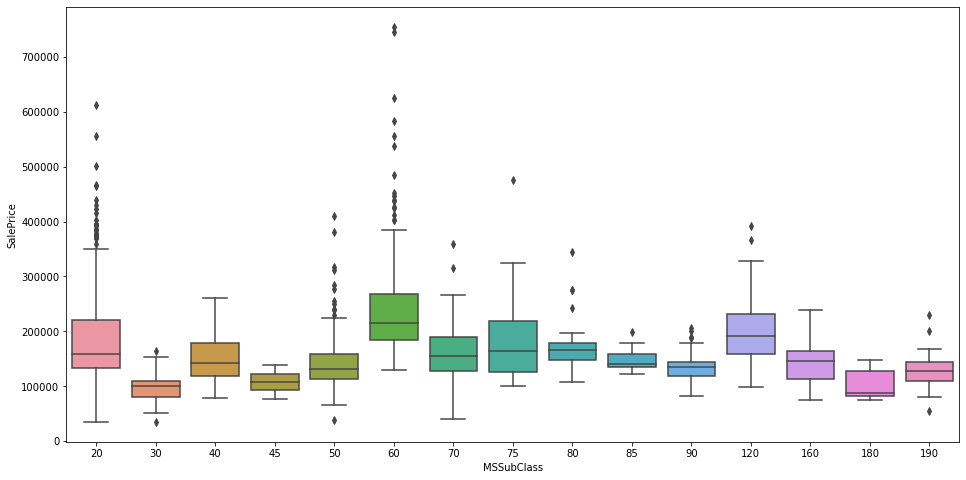

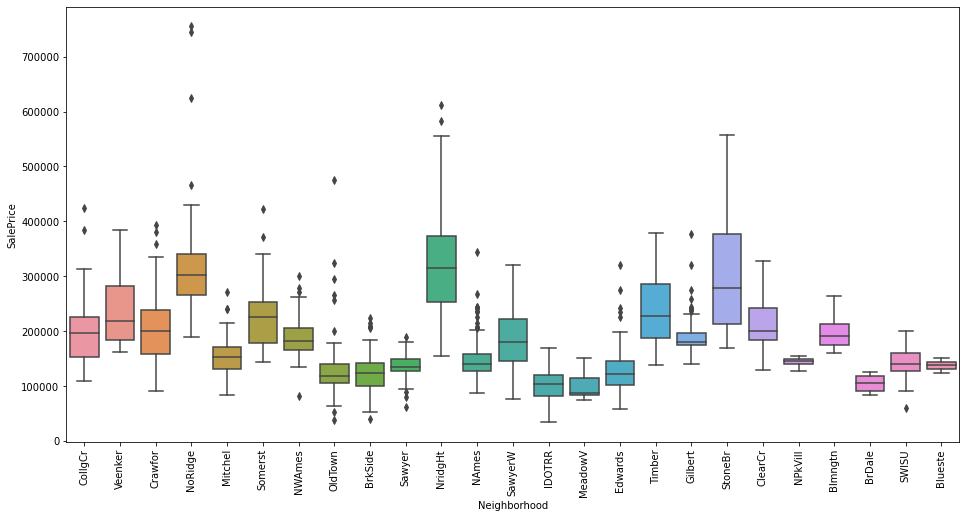

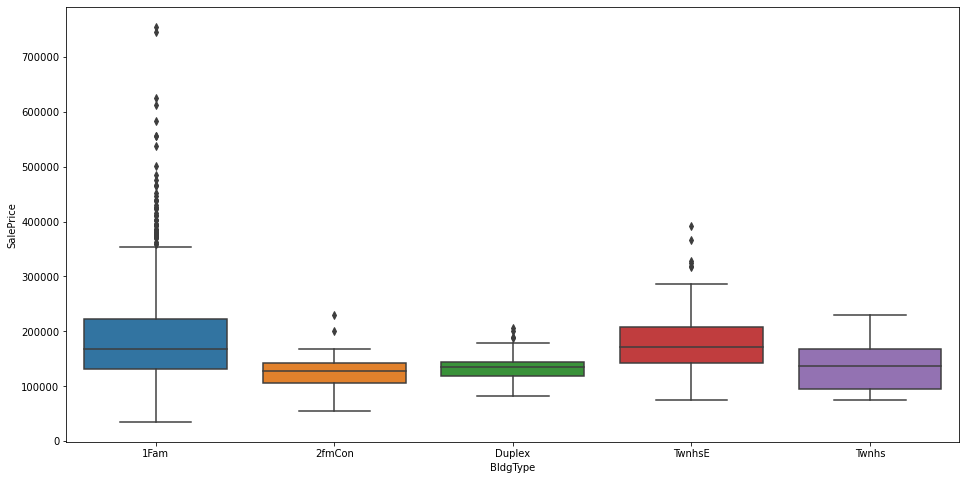

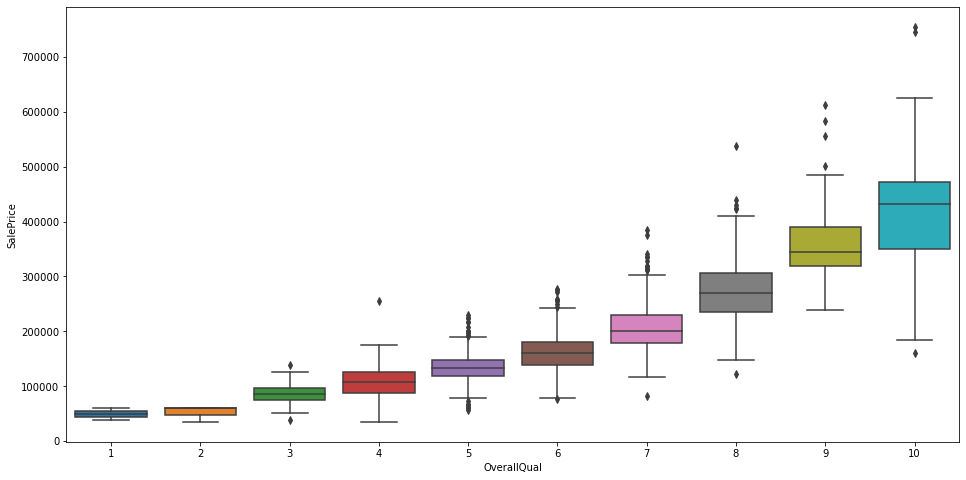

In [10]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x="MSSubClass", y="SalePrice", data=housedata)
f = plt.figure(figsize=(16, 8))
sb.boxplot(x="Neighborhood", y="SalePrice", data=housedata)
plt.xticks(rotation=90);
f = plt.figure(figsize=(16, 8))
sb.boxplot(x="BldgType", y="SalePrice", data=housedata)
f = plt.figure(figsize=(16, 8))
sb.boxplot(x="OverallQual", y="SalePrice", data=housedata)

### 2b) OverallQual: some sort of linear relationship, variation in SalePrice across OverallQual
###       Neighborhood: More variation in SalePrice compared to BldgType, less outliers compared to MSSubClass

# Problem 3

In [11]:
remod = pd.DataFrame(housedata[["YearRemodAdd", "SalePrice"]])

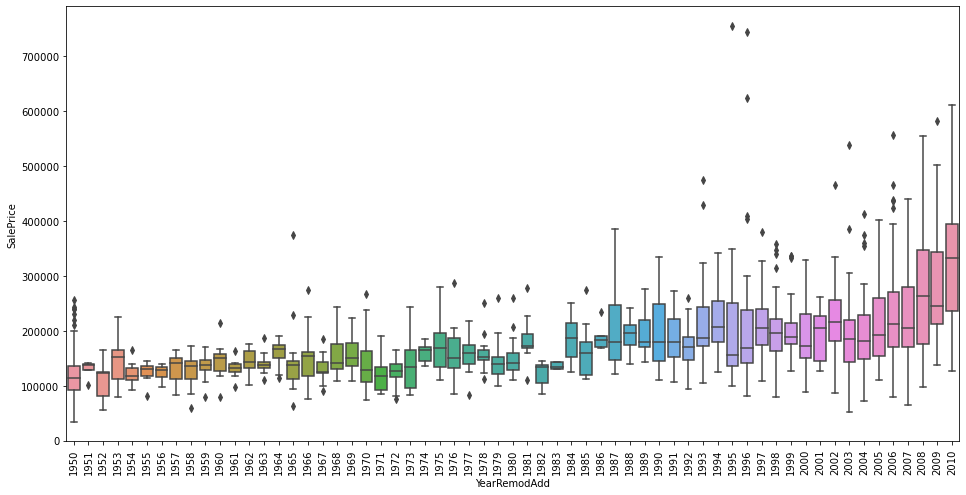

In [12]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x="YearRemodAdd", y="SalePrice", data=remod)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

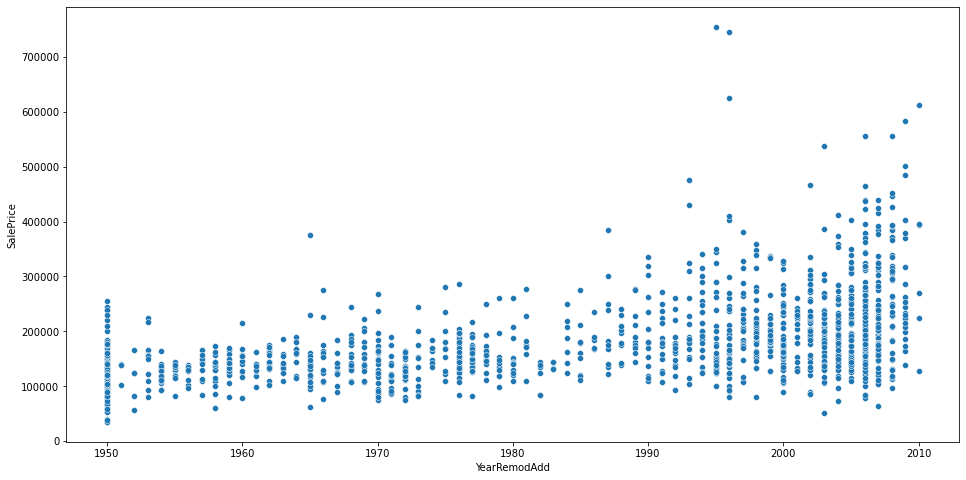

In [13]:
f = plt.figure(figsize=(16, 8))
sb.scatterplot(data=remod, x="YearRemodAdd", y="SalePrice")

In [14]:
print(remod.corr())

              YearRemodAdd  SalePrice
YearRemodAdd      1.000000   0.507101
SalePrice         0.507101   1.000000


### 3. Moderate correlation between SalePrice and how recently the house got remodeled. SalePrice is concentrated within the same range with most data points within the 100k and 200k range, but a good number of data points skew towards higher sale prices in the more recent years.

In [15]:
morepoints = pd.DataFrame(housedata[["YearRemodAdd", "OverallQual", "SalePrice"]])
print(morepoints.corr())

              YearRemodAdd  OverallQual  SalePrice
YearRemodAdd      1.000000     0.550684   0.507101
OverallQual       0.550684     1.000000   0.790982
SalePrice         0.507101     0.790982   1.000000


### Can also consider the correlation between year remod and overall qual, where more recent remod could mean that the overall quality is higher, this is seen by a moderate correlation of 0.55.
### OverallQual has a stronger correlation with SalePrice at 0.79.